#### Exploratory Data Analysis

In [4]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [5]:
# reading aisles dataset
aisles = pd.read_csv('data/aisles.csv')

In [6]:
# reading department dataset
department = pd.read_csv('data/departments.csv')

In [7]:
all_orders_train = pd.read_csv('data/all_orders_train.csv')

In [8]:
all_orders_prior = pd.read_csv('data/all_orders_prior.csv')

In [9]:
all_orders = pd.read_csv('data/all_orders.csv')

In [10]:
all_orders_train.isnull().sum()

product_id                0
product_name              0
aisle_id                  0
department_id             0
order_id                  0
add_to_cart_order         0
reordered                 0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [11]:
all_orders_prior.isnull().sum()

product_id                0
product_name              0
aisle_id                  0
department_id             0
order_id                  0
add_to_cart_order         0
reordered                 0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [12]:
# average days since prior orders in the all_orders_train 
np.mean(all_orders_train['days_since_prior_order']) # average of 17 days since prior order

17.056305371480914

In [13]:
# average days since prior orders in the all_orders_prior
np.mean(all_orders_prior['days_since_prior_order']) # average of 11 days since prior order

11.05868732979885

In [14]:
all_orders_train.shape

(69869, 13)

In [15]:
len(all_orders_train['user_id'].unique())

6632

In [16]:
len(all_orders_train['order_number'].unique())

96

In [17]:
len(all_orders_train['order_id'].unique())

6632

**Days of Week**

In [18]:
order_dow = all_orders['order_dow'].value_counts().sort_values(ascending = False)

In [71]:
order_dow = order_dow.rename({0:'Sunday', 1: 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4 : 'Thursday', 5 : 'Friday', 6 : 'Saturday'})

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


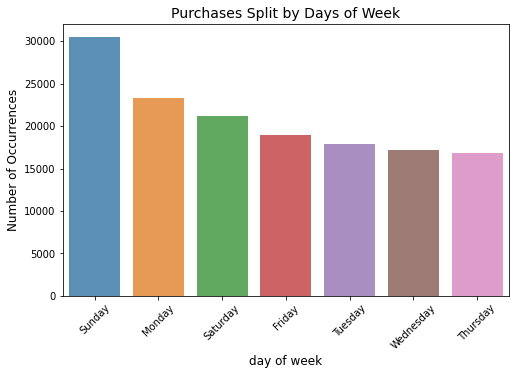

In [72]:
plt.figure(figsize=(8,5))
sns.barplot(order_dow.index, order_dow.values, alpha=0.8)
plt.title('Purchases Split by Days of Week', fontsize = 14)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('day of week', fontsize=12)
plt.xticks(rotation=45)
plt.show();

The busiest day was Sunday, followed by Monday. The least number of transactions were made on Thursday.

In [20]:
order_dow_train = all_orders_train['order_dow'].value_counts().sort_values(ascending = False)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


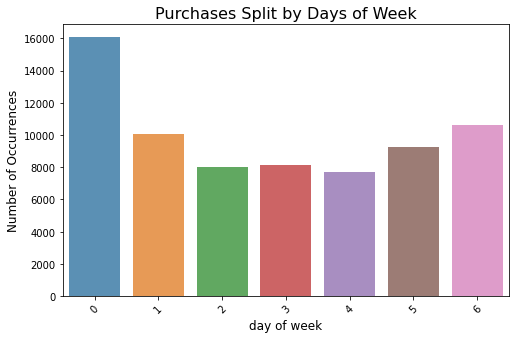

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(order_dow_train.index, order_dow_train.values, alpha=0.8)
plt.title('Purchases Split by Days of Week', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('day of week', fontsize=12)
plt.xticks(rotation=45)
plt.show();

In the train dataset, majority of the purchases were made on Sunday, followed by Saturday. Lowest number of transactions were made on Tuesday.

In [22]:
order_dow_prior = all_orders_prior['order_dow'].value_counts(normalize = True).sort_values(ascending = False)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


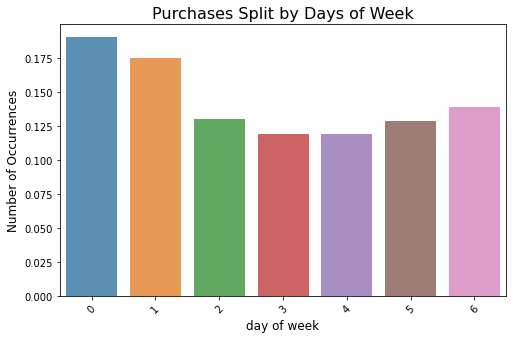

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(order_dow_prior.index, order_dow_prior.values, alpha=0.8)
plt.title('Purchases Split by Days of Week', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('day of week', fontsize=12)
plt.xticks(rotation=45)
plt.show();

In the prior dataset, majority of the purchases were made on Sunday, followed by Monday, and Saturday. Lowest number of transactions were made on Thursday. 

**Hour of Day**

In [24]:
order_hour = all_orders['order_hour_of_day'].value_counts(normalize = True)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


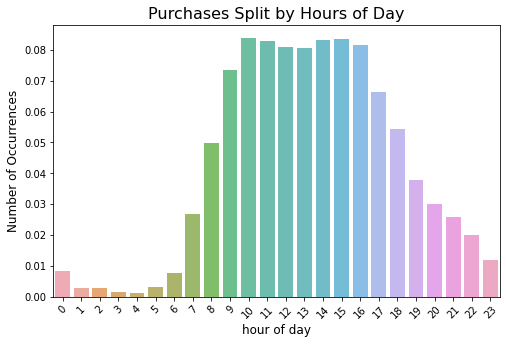

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(order_hour.index, order_hour.values, alpha=0.8)
plt.title('Purchases Split by Hours of Day', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('hour of day', fontsize=12)
plt.xticks(rotation=45)
plt.show();

Majority of transactions occurred between 11am and 3pm. 

In [26]:
order_hour_prior = all_orders_prior['order_hour_of_day'].value_counts(normalize = True)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


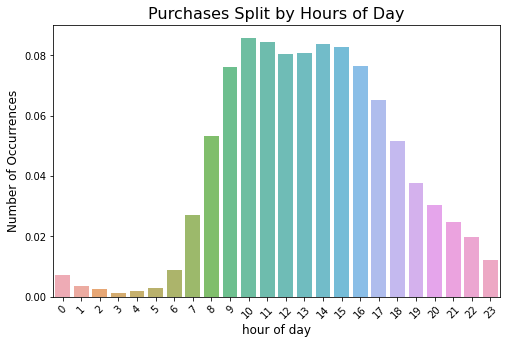

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(order_hour_prior.index, order_hour_prior.values, alpha=0.8)
plt.title('Purchases Split by Hours of Day', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('hour of day', fontsize=12)
plt.xticks(rotation=45)
plt.show();

Within prior orders, majority of transactions occur between 10am and 4pm.

In [28]:
order_hour_train = all_orders_train['order_hour_of_day'].value_counts(normalize = True)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


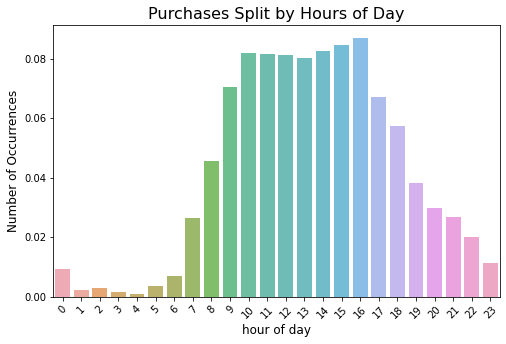

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(order_hour_train.index, order_hour_train.values, alpha=0.8)
plt.title('Purchases Split by Hours of Day', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('hour of day', fontsize=12)
plt.xticks(rotation=45)
plt.show();

Within train orders, majority of transactions were made between 11am and 4pm.

**Hour of day on the busiest day**

In [30]:
filter_dow = all_orders['order_dow'] == 0
sunday_orders = all_orders[filter_dow]
sunday_orders_hour = sunday_orders['order_hour_of_day'].value_counts(normalize = True)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


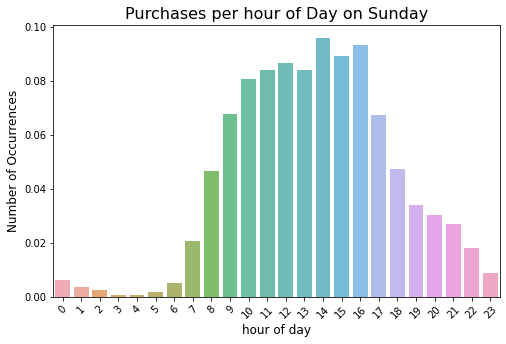

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(sunday_orders_hour.index, sunday_orders_hour.values, alpha=0.8)
plt.title('Purchases per hour of Day on Sunday', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('hour of day', fontsize=12)
plt.xticks(rotation=45)
plt.show();

Looking at Sunday exclusively (the busiest day), transactions are peaked at 11am , 1pm, 3pm. 

In [32]:
filter_dow = all_orders_prior['order_dow'] == 0
sunday_orders_prior = all_orders_prior[filter_dow]
sunday_orders_hour_prior = sunday_orders_prior['order_hour_of_day'].value_counts(normalize = True)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


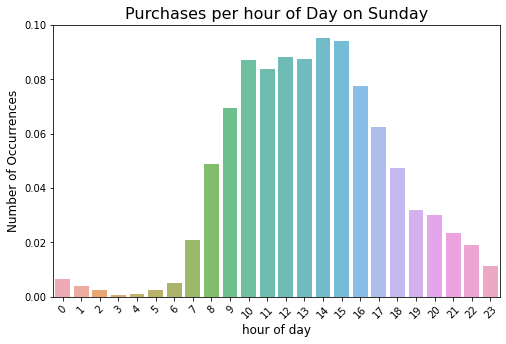

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(sunday_orders_hour_prior.index, sunday_orders_hour_prior.values, alpha=0.8)
plt.title('Purchases per hour of Day on Sunday', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('hour of day', fontsize=12)
plt.xticks(rotation=45)
plt.show();

In the prior orders, on the busiest day (Sunday), most purchases were made between 10m and 3pm. 

In [34]:
filter_dow_train = all_orders_train['order_dow'] == 0
sunday_orders_train = all_orders_train[filter_dow_train]
sunday_orders_hour_train = sunday_orders_train['order_hour_of_day'].value_counts(normalize = True)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


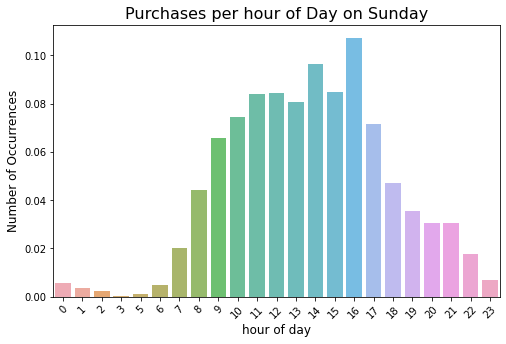

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(sunday_orders_hour_train.index, sunday_orders_hour_train.values, alpha=0.8)
plt.title('Purchases per hour of Day on Sunday', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('hour of day', fontsize=12)
plt.xticks(rotation=45)
plt.show();

In the train orders, looking only at the busiest day of the week (Sunday), transactions were more peaked at 3pm.

**Aisles split by day of week**

In [36]:
sunday_orders_product = sunday_orders['aisle'].value_counts()[:10].sort_values(ascending = False)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


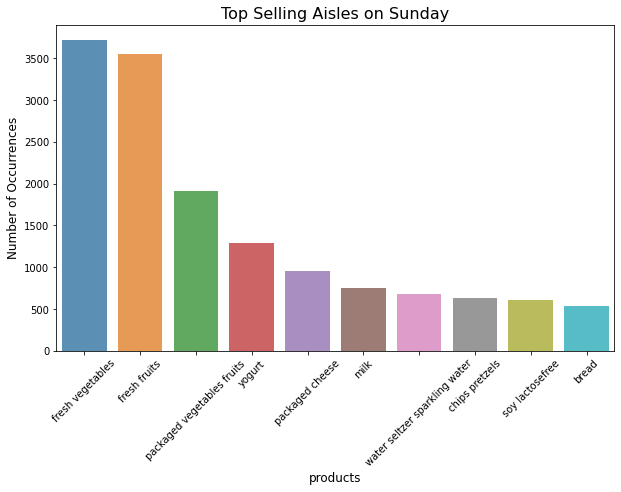

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(sunday_orders_product.index, sunday_orders_product.values, alpha=0.8)
plt.title('Top Selling Aisles on Sunday', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('products', fontsize=12)
plt.xticks(rotation=45)
plt.show();

In [38]:
filter_thur = all_orders['order_dow'] == 4
thur_orders = all_orders[filter_thur]
thur_aisles = thur_orders['aisle'].value_counts()[:10].sort_values(ascending = False)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


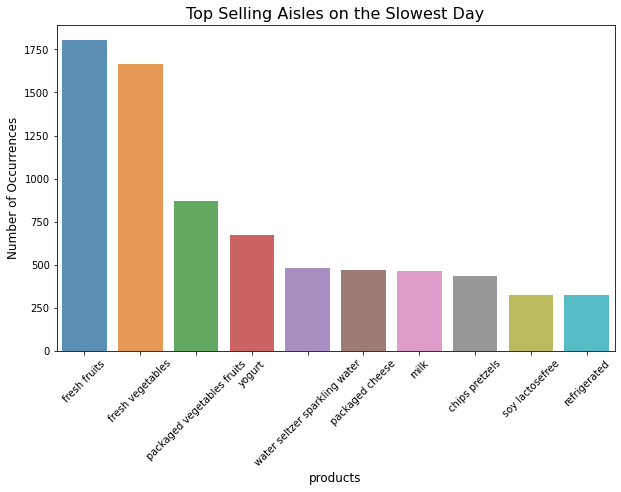

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(thur_aisles.index, thur_aisles.values, alpha=0.8)
plt.title('Top Selling Aisles on the Slowest Day', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('products', fontsize=12)
plt.xticks(rotation=45)
plt.show();

**Aisles by hour of day**

In [40]:
morning_orders = pd.read_csv('data/morning_orders.csv')

In [41]:
morning_aisles = morning_orders['aisle'].value_counts()[:10].sort_values(ascending = False)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


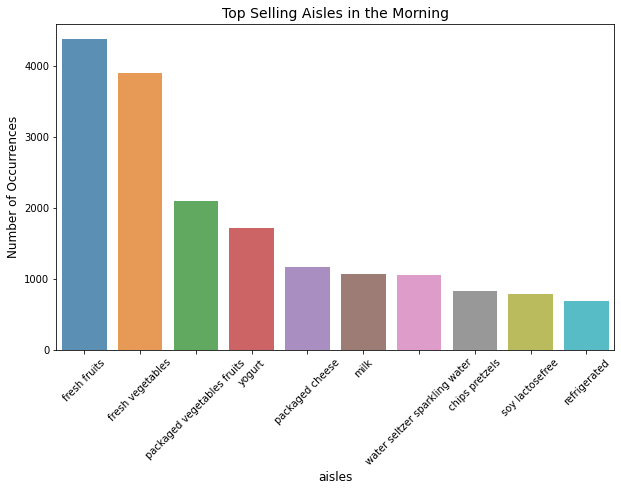

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(morning_aisles.index, morning_aisles.values, alpha=0.8)
plt.title('Top Selling Aisles in the Morning', fontsize = 14)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('aisles', fontsize=12)
plt.xticks(rotation=45)
plt.show();

In [43]:
day_orders = pd.read_csv('data/day_orders.csv')

In [44]:
day_aisles = day_orders['aisle'].value_counts()[:10].sort_values(ascending = False)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


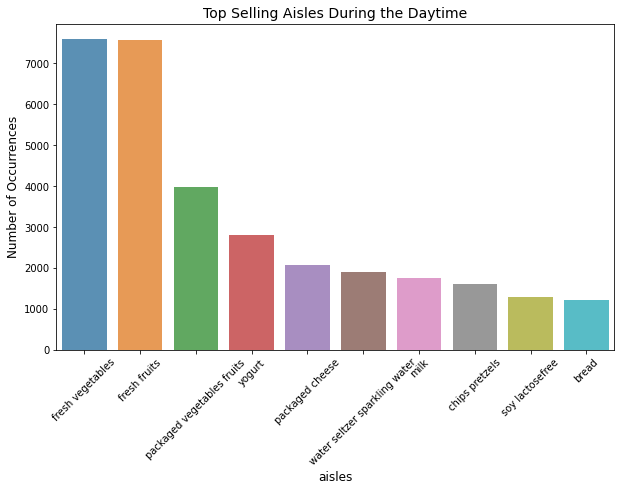

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(day_aisles.index, day_aisles.values, alpha=0.8)
plt.title('Top Selling Aisles During the Daytime', fontsize = 14)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('aisles', fontsize=12)
plt.xticks(rotation=45)
plt.show();

In [46]:
evening_orders = pd.read_csv('data/evening_orders.csv')

In [47]:
evening_aisles = evening_orders['aisle'].value_counts()[:10].sort_values(ascending = False)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


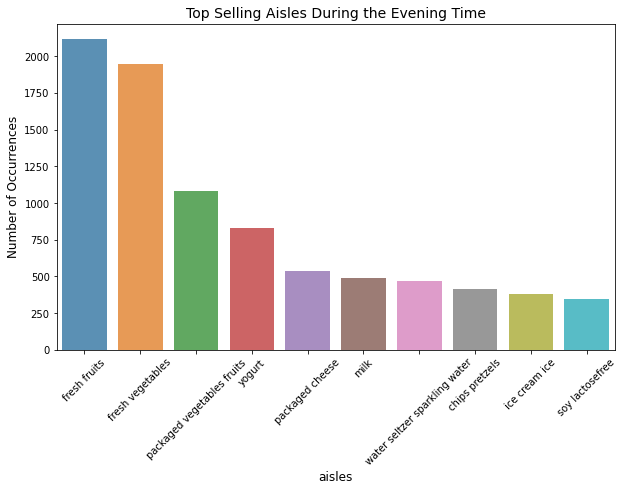

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(evening_aisles.index, evening_aisles.values, alpha=0.8)
plt.title('Top Selling Aisles During the Evening Time', fontsize = 14)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('aisles', fontsize=12)
plt.xticks(rotation=45)
plt.show();

**Top Products**

In [49]:
top_30 = all_orders['product_name'].value_counts()[:20].sort_values(ascending=False)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


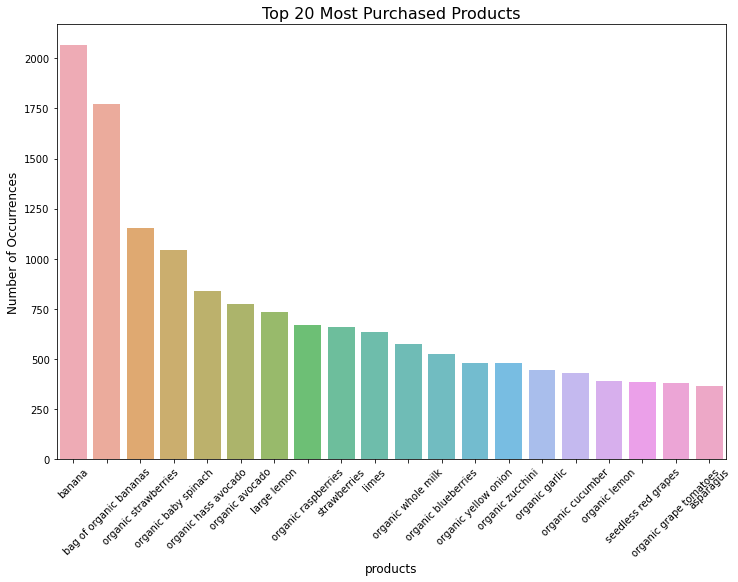

In [50]:
plt.figure(figsize=(12,8))
sns.barplot(top_30.index, top_30.values, alpha=0.8)
plt.title('Top 20 Most Purchased Products', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('products', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Top 5 purchased products are: banana, bag of organic bananas, organic strawberries, organic baby spinach, organic hass avocado.

In [51]:
top_30_prior = all_orders_prior['product_name'].value_counts()[:30].sort_values(ascending=False)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


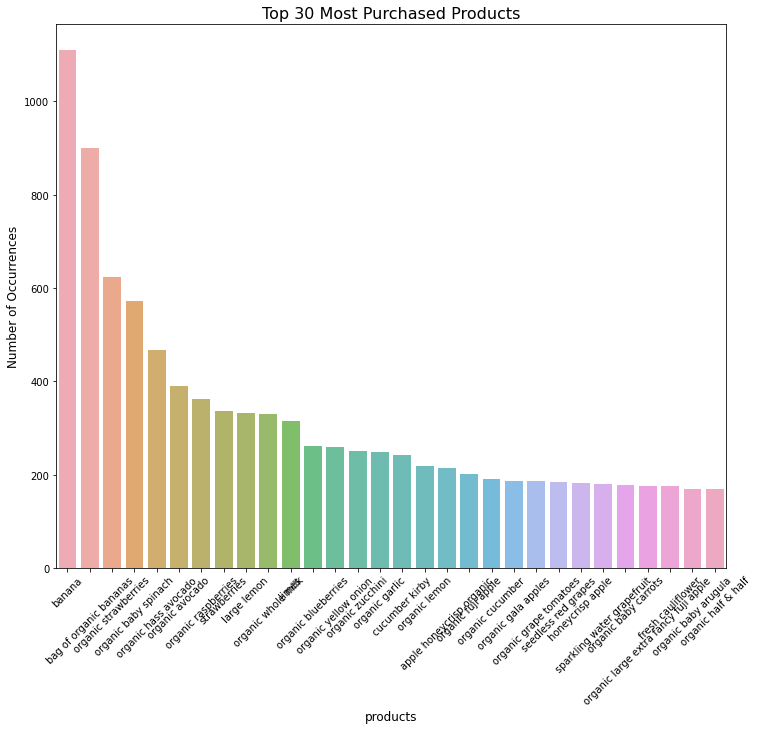

In [52]:
plt.figure(figsize=(12,10))
sns.barplot(top_30_prior.index, top_30_prior.values, alpha=0.8)
plt.title('Top 30 Most Purchased Products', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('products', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Top 5 purchased products are: banana, bag of organic bananas, organic strawberries, organic baby spinach, organic hass avocado.

In [53]:
top_30_train = all_orders_train['product_name'].value_counts()[:30].sort_values(ascending=False)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


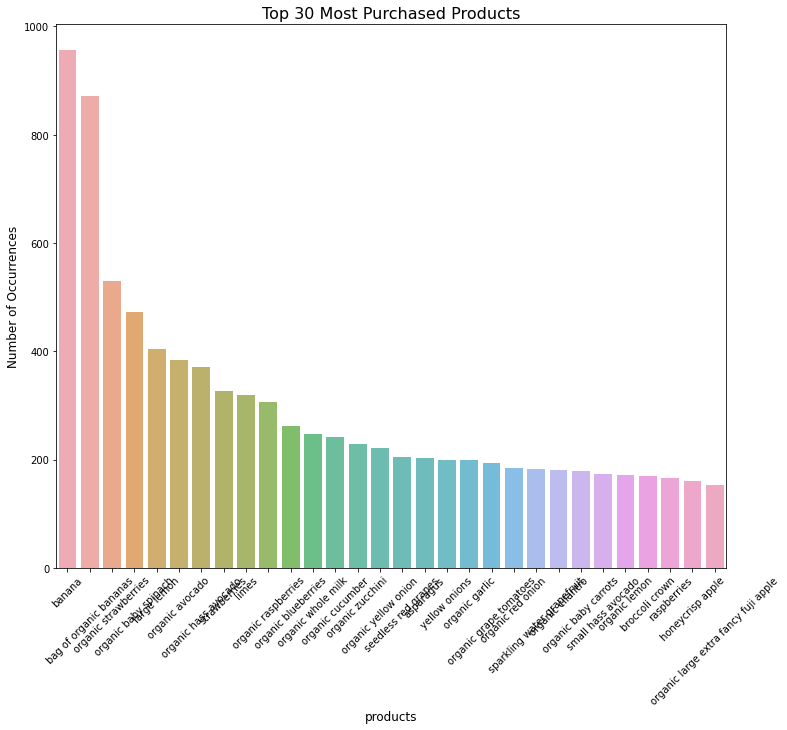

In [54]:
plt.figure(figsize=(12,10))
sns.barplot(top_30_train.index, top_30_train.values, alpha=0.8)
plt.title('Top 30 Most Purchased Products', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('products', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In the train set, most purchased products are banana, bag of organic bananas, organic strawberries, organic 

**Reordered Products**

In [55]:
filter_reordered = all_orders['reordered'] == 1
reordered_prod = all_orders[filter_reordered]
reordered_prod = reordered_prod['product_name'].value_counts()[:20].sort_values(ascending=False)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


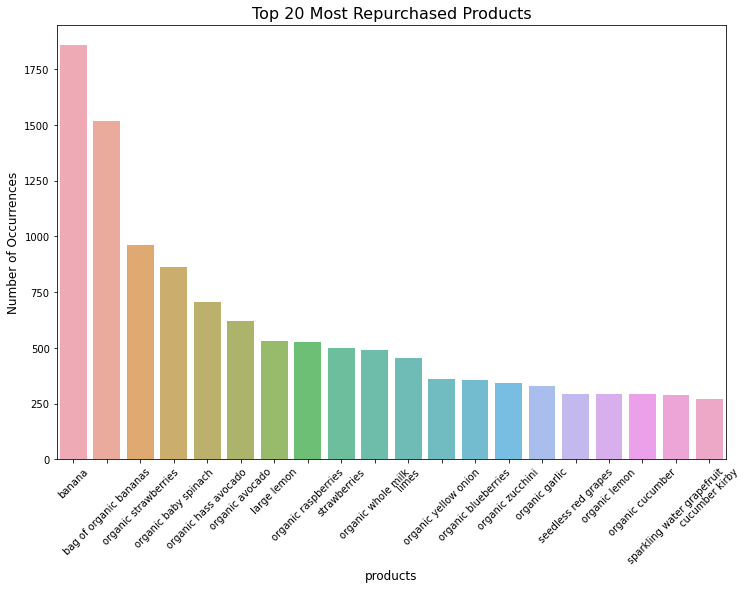

In [56]:
plt.figure(figsize=(12,8))
sns.barplot(reordered_prod.index, reordered_prod.values, alpha=0.8)
plt.title('Top 20 Most Repurchased Products', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('products', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Highest reordered products are similar: banana, bag of organic bananas, organic strawberries, organic baby spinach, organic hass avocado. 

In [57]:
filter_reordered_prior = all_orders_prior['reordered'] == 1
reordered_prod_prior = all_orders_prior[filter_reordered_prior]
reordered_prior = reordered_prod_prior['product_name'].value_counts()[:30].sort_values(ascending=False)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


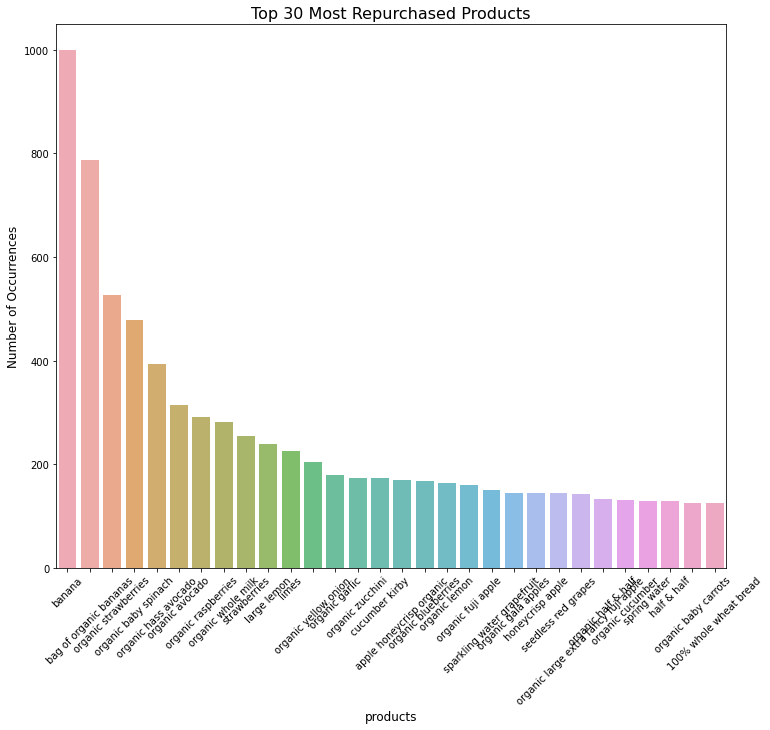

In [58]:
plt.figure(figsize=(12,10))
sns.barplot(reordered_prior.index, reordered_prior.values, alpha=0.8)
plt.title('Top 30 Most Repurchased Products', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('products', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Within prior orders, most repurchased products are banana, bag of organic bananas, organic strawberries, organic baby spincha, organic haas avocado.

In [59]:
filter_reordered_train = all_orders_train['reordered'] == 1
reordered_prod_train = all_orders_train[filter_reordered_train]
reordered_train = reordered_prod_train['product_name'].value_counts()[:30].sort_values(ascending=False)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


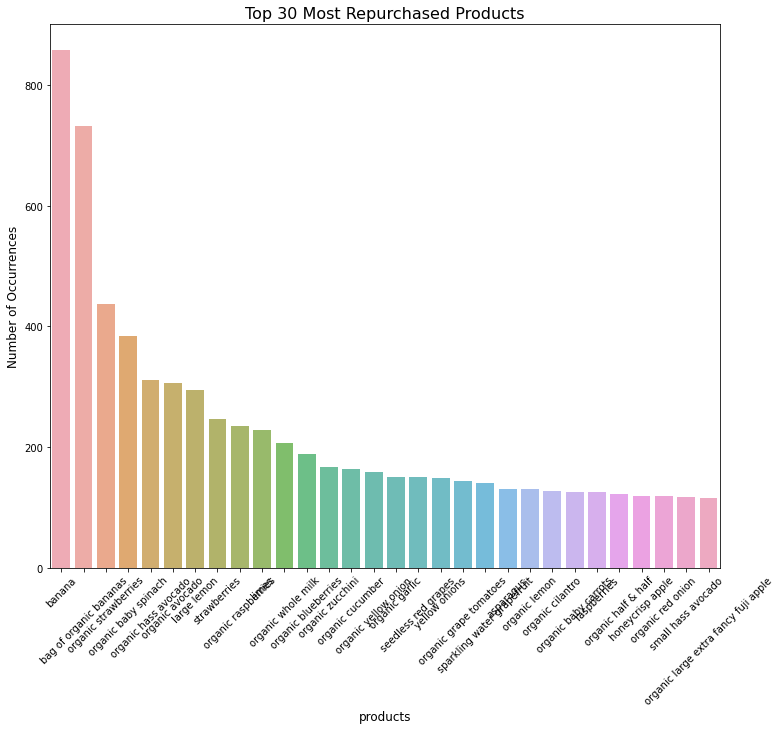

In [60]:
plt.figure(figsize=(12,10))
sns.barplot(reordered_train.index, reordered_train.values, alpha=0.8)
plt.title('Top 30 Most Repurchased Products', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('products', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In the train orders, among most repurchased products banana, bag of organic bananas, organic strawberries, organic baby spinach, organic avocado. 

**Days Since Prior Purchase**

In [61]:
repurchased_days = all_orders['days_since_prior_order'].astype('int64').value_counts().sort_values()

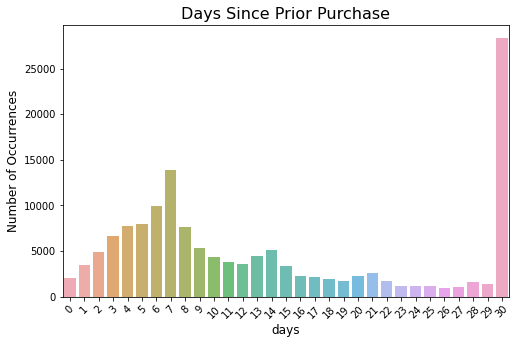

In [62]:
plt.figure(figsize=(8,5))
sns.barplot(x = repurchased_days.index, y = repurchased_days.values, alpha=0.8)
plt.title('Days Since Prior Purchase', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('days', fontsize=12)
plt.xticks(rotation=45)
plt.show();

Purchases appear to be cyclical - most repurchases happen within 7 and 30 days since the last transaction. 

In [63]:
repurchased_days_prior = all_orders_prior['days_since_prior_order'].astype('int64').value_counts().sort_values()

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


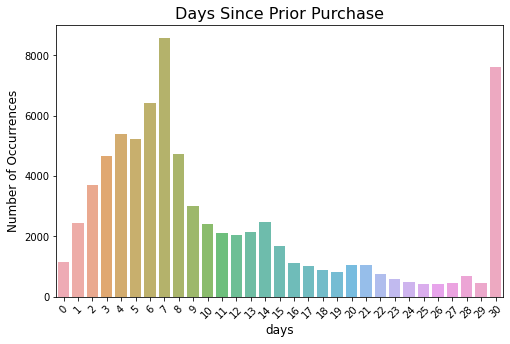

In [64]:
plt.figure(figsize=(8,5))
sns.barplot(repurchased_days_prior.index, repurchased_days_prior.values, alpha=0.8)
plt.title('Days Since Prior Purchase', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('days', fontsize=12)
plt.xticks(rotation=45)
plt.show();

Orders appear to be cyclical - most repurchases occur within 7 and 30 days from the initial transactions. 

In [65]:
repurchased_days_train = all_orders_train['days_since_prior_order'].astype('int64').value_counts().sort_values()

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


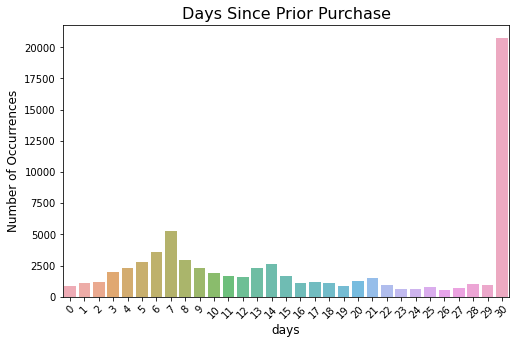

In [66]:
plt.figure(figsize=(8,5))
sns.barplot(repurchased_days_train.index, repurchased_days_train.values, alpha=0.8)
plt.title('Days Since Prior Purchase', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('days', fontsize=12)
plt.xticks(rotation=45)
plt.show();

In the train dataset, purchases seem to be cyclical (prior orders occurring 7 and 30 days ago) - much higher peaked at 30 days. 

**Total products per order id**

In [327]:
# group by order_id to see highest number of products per order less than 21
num_prod_per_order = number_prod.groupby('order_id')['quantity'].sum().sort_values(ascending = False)
num_prod_per_order = num_prod_per_order[num_prod_per_order < 21]

In [328]:
# value count and normalize values
num_prod = pd.DataFrame(num_prod_per_order)
num_normalized = pd.DataFrame(num_prod.value_counts(normalize=True))
# reset index
num_normalized.reset_index(level=0, inplace=True)
# rename columns to make more sense
num_normalized.rename(columns = {0:'order_count', 'quantity':'number_of_prod'}, inplace = True)

In [329]:
# turn number of prod column into integer
num_normalized['number_of_prod'] = num_normalized['number_of_prod'].astype('int64')

In [318]:
# turn order_count column into %
formatted_num = num_normalized.style.format({'order_count': '{:,.2%}'.format})

In [326]:
type(formatted_num)

pandas.io.formats.style.Styler

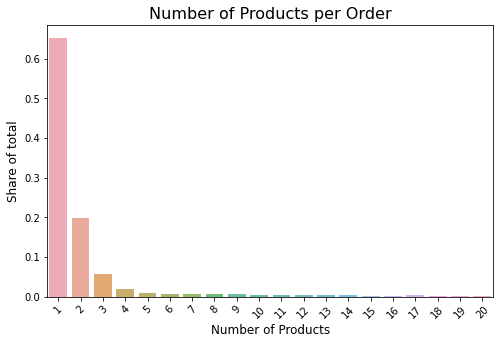

In [330]:
plt.figure(figsize=(8,5))
sns.barplot(x = normalized_df['number_of_prod'], y = normalized_df['order_count'], alpha=0.8)
plt.title('Number of Products per Order', fontsize = 16)
plt.ylabel('Share of total', fontsize=12)
plt.xlabel('Number of Products', fontsize=12)
plt.xticks(rotation=45)
plt.show();